# Angle Dependent Reflection Filter

Compute normal incidence reflection filter coefficients, starting from the known asphalt absorption coefficients

In [97]:
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt

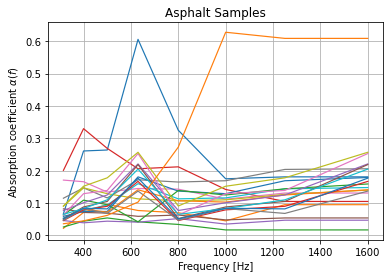

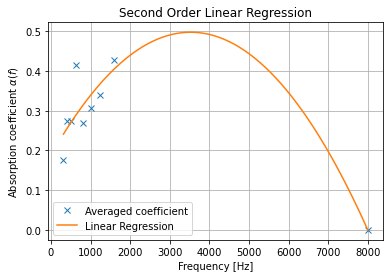

In [153]:
f = np.array([315, 400, 500, 630, 800, 1000, 1250, 1600])
m1 = np.array([0.067, 0.261, 0.264, 0.606, 0.325, 0.175, 0.181, 0.181])
m2 = np.array([0.022, 0.071, 0.096, 0.077, 0.070, 0.045, 0.095, 0.095])
m3 = np.array([0.026, 0.044, 0.054, 0.042, 0.034, 0.017, 0.017, 0.017])
m4 = np.array([0.201, 0.330, 0.269, 0.206, 0.212, 0.142, 0.105, 0.105])

p1 = np.array([0.046, 0.039, 0.044, 0.041, 0.052, 0.035, 0.047, 0.047])
p2 = np.array([0.036, 0.045, 0.062, 0.103, 0.273, 0.628, 0.609, 0.609])
p3 = np.array([0.082, 0.071, 0.069, 0.059, 0.063, 0.048, 0.054, 0.054])
p4 = np.array([0.171, 0.166, 0.134, 0.145, 0.143, 0.112, 0.131, 0.131])

tino1 = np.array([0.115, 0.147, 0.116, 0.172, 0.165, 0.169, 0.204, 0.206])
tino2 = np.array([0.09, 0.147, 0.129, 0.113, 0.107, 0.110, 0.127, 0.140])

anas5old1 = np.array([0.054, 0.077, 0.094, 0.16, 0.113, 0.116, 0.144, 0.148])
anas5p1 = np.array([0.047, 0.064, 0.043, 0.116, 0.091, 0.082, 0.100, 0.107])
anas15 = np.array([0.052, 0.062, 0.056, 0.111, 0.093, 0.100, 0.134, 0.140])
anas0old2 = np.array([0.059, 0.074, 0.074, 0.181, 0.137, 0.129, 0.169, 0.179])
anas0p2 = np.array([0.049, 0.081, 0.072, 0.141, 0.107, 0.103, 0.125, 0.141])
anas10 = np.array([0.063, 0.109, 0.095, 0.042, 0.139, 0.125, 0.144, 0.159])
iso103p = np.array([0.046, 0.079, 0.090, 0.167, 0.046, 0.079, 0.090, 0.167])
iso103 = np.array([0.077, 0.101, 0.125, 0.221, 0.077, 0.101, 0.125, 0.221])
isoAE4p = np.array([0.052, 0.088, 0.105, 0.219, 0.052, 0.088, 0.105, 0.219])
isoAE4 = np.array([0.063, 0.129, 0.139, 0.253, 0.063, 0.129, 0.139, 0.253])
disc5 = np.array([0.047, 0.083, 0.068, 0.137, 0.047, 0.083, 0.068, 0.137])
cont6les = np.array([0.091, 0.152, 0.178, 0.257, 0.091, 0.152, 0.178, 0.257])
cont6 = np.array([0.065, 0.083, 0.110, 0.205, 0.065, 0.083, 0.110, 0.205])
disc7 = np.array([0.051, 0.084, 0.082, 0.177, 0.051, 0.084, 0.082, 0.177])
asphalts2 = np.matrix([m1, m2, m3, m4, p1, p3, p4, tino1, tino2, anas5old1, anas0old2,
    anas0p2, anas10, iso103p, iso103, isoAE4p, isoAE4, disc5, cont6les,
    cont6, disc7, p2])

plt.figure()
plt.plot(f, asphalts2.T, linewidth = 1.2)
plt.title('Asphalt Samples')
plt.xlabel('Frequency [Hz]')
plt.ylabel(r'Absorption coefficient $\alpha(f)$')
plt.grid()
plt.show()

asphalts2 = np.c_[asphalts2, np.zeros(np.shape(asphalts2)[0])]
f = np.append(f, 8000)

# Compute average coefficients
alpha_avg = np.asarray(np.sum(asphalts2, axis = 0)).flatten() / np.shape(asphalts2)[1]
model_alpha2 = np.polyfit(f, alpha_avg, deg = 2)

f1 = np.linspace(315, 8000, num = 100)
estimated_asphalts = np.polyval(model_alpha2, f1)

plt.figure()
plt.plot(f, alpha_avg, 'x', linewidth = 1.1)
plt.plot()
plt.plot(f1, estimated_asphalts, linewidth = 1.5)
plt.title('Second Order Linear Regression')
plt.xlabel('Frequency [Hz]')
plt.ylabel(r'Absorption coefficient $\alpha(f)$')
plt.legend(['Averaged coefficient', 'Linear Regression'])
plt.grid()
plt.show()


Frequencies:  [   0.    571.43 1142.86 1714.29 2285.71 2857.14 3428.57 4000.  ]
Absorption Coefficients:  [0.19 0.28 0.36 0.42 0.46 0.49 0.5  0.49]


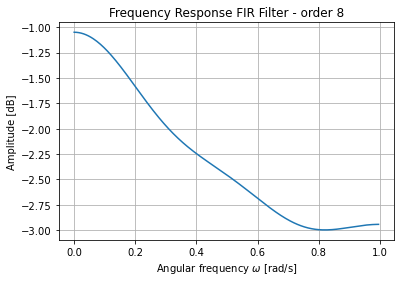

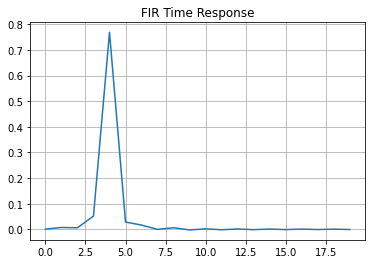

In [154]:
# f = np.array([0, 0.03125, 0.0625, 0.125, 0.25, 0.5, 0.6, 1])
# alpha = np.array([0.02, 0.02, 0.03, 0.03, 0.03, 0.04, 0.04, 0.07])
f_nyq = 4000
f_sel = np.linspace(0,1,8) * f_nyq
alpha_sel = np.polyval(model_alpha2, f_sel)

print('Frequencies: ', np.around(f_sel, 2))
print('Absorption Coefficients: ', np.around(alpha_sel, 2))

numtaps = 9
filter_len = 256

refl = np.sqrt(1 - alpha_sel)
b_fir = scipy.signal.firls(numtaps, f_sel / 4000, refl)

w, H_fir = scipy.signal.freqz(b_fir, a=1, worN = filter_len)
H_fir_full = np.concatenate((H_fir, H_fir[-2:0:-1].conj()))

h_fir = np.fft.ifft(H_fir_full).real

plt.figure()
plt.plot(w/np.pi, 20 * np.log10(abs(H_fir)))
plt.title('Frequency Response FIR Filter - order %d' %(numtaps - 1))
plt.xlabel(r"Angular frequency $\omega$ [rad/s]")
plt.ylabel("Amplitude [dB]")
plt.grid()
plt.show()

plt.figure()
plt.plot(np.concatenate((h_fir, np.zeros(512 - len(h_fir))))[0:20])
plt.title('FIR Time Response')
plt.grid()
plt.show()
